In [86]:
import os
import sys
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import importlib
import seaborn as sns

sys.path.append('..')
import catrace
import catrace.scale as catscale
import catrace.process_time_trace as ptt
import catrace.exp_collection as ecl
import catrace.cluster as caclust
import dataset_param as dtpar

In [87]:
region = 'Dp'
separate_region = False
if separate_region:
    all_dfovf_select = pd.read_pickle(os.path.join(dtpar.db_dir, 'all_dfovf_select.pkl'))
    all_dfovf_select_rg = all_dfovf_select.xs(region, level='region', axis=1)
    all_dfovf_select_rg.to_pickle(os.path.join(dtpar.db_dir, f'all_dfovf_select_{region}.pkl'))

In [88]:
compute_response = False
if compute_response:
    all_dfovf_select_rg = pd.read_pickle(os.path.join(dtpar.db_dir, f'all_dfovf_select_{region}.pkl'))
    if region =='OB':
        time_window = [5.5,11]
    else:
        time_window = [5,7]   
    frame_rate = 30/4
    all_response = ptt.mean_pattern_in_time_window(all_dfovf_select_rg, time_window, frame_rate)
    all_response.to_pickle(os.path.join(dtpar.db_dir, f'all_response_select_{region}.pkl'))
    all_response

In [370]:
all_response = pd.read_pickle(os.path.join(dtpar.db_dir, 'all_response_select_{}.pkl'.format(region)))
all_response

fish_id     2021-02-05-DpOBEM-JH9                                          \
cond                      phe-arg                                           
plane                           0                                           
neuron                        1         2         3         4         6     
odor  trial                                                                 
phe   0                  0.000200  0.209071  0.492094  0.474856 -0.013714   
      1                  0.243173 -0.022423  0.559050  0.397474  0.015055   
      2                  0.036004  0.048652  0.147587 -0.068843 -0.078841   
trp   0                 -0.020108  0.409061 -0.034526  0.172329  0.252261   
      1                  0.098764  0.288644  0.048206  0.129740  0.178743   
      2                  0.118979  0.330661 -0.034567 -0.066544  0.074195   
arg   0                  0.043738  0.141261 -0.030435  0.065854  0.461075   
      1                  0.069129  0.117999  0.238499  0.419269  0.127385   
      2                  0.017971  0.179629  0.189134  0.373900 -0.084077   
tdca  0                  0.055465  0.117861  0.071263 -0.057732  0.127823   
      1                  0.021753  0.089649 -0.086117 -0.004822 -0.021328   
      2                  0.075765  0.177125 -0.023670  0.316943  0.012088   
tca   0                  0.029793  0.113502  0.041647  0.120897  0.015454   
      1                  0.061789  0.046316  0.015583  0.064048  0.133865   
      2                  0.094398  0.015964 -0.001715 -0.047148  0.029763   
gca   0                 -0.062147 -0.072202 -0.056622  0.064611  0.056811   
      1                 -0.312422  0.081823  0.070302 -0.062725 -0.037224   
      2                  0.003238  0.111933  0.087542 -0.111042 -0.096473   
acsf  0                  0.129578  0.067252  0.113606  0.020651 -0.075632   
      1                  0.106135 -0.073797  0.018098  0.075378  0.125090   
      2                  0.164553  0.118102  0.104945  0.196501 -0.006301   
spont 0                  0.003318  0.107230  0.016274  0.087140  0.012023   
      1                  0.012960  0.026936 -0.073952 -0.121734 -0.027901   
      2                 -0.039621  0.006412 -0.098490 -0.204592  0.037356   

fish_id                                                        ...  \
cond                                                           ...   
plane                                                          ...   
neuron            7         8         12        17        22   ...   
odor  trial                                                    ...   
phe   0     -0.024605 -0.074521  0.092936 -0.007029 -0.020326  ...   
      1      0.074823 -0.010026  0.089967  0.020651 -0.006347  ...   
      2      0.151725 -0.014862  0.169540  0.140089  0.169556  ...   
trp   0      0.129817 -0.032269  0.094983  0.094825  0.048034  ...   
      1      0.128250  0.042115 -0.102639  0.068903  0.016555  ...   
      2     -0.059373  0.075893  0.065007  0.023148  0.116972  ...   
arg   0      0.033696  0.019058  0.010971  0.049436 -0.005199  ...   
      1      0.316417  0.155094 -0.021431  0.130642 -0.053902  ...   
      2     -0.059250  0.010679 -0.005548  0.056502  0.068987  ...   
tdca  0     -0.077840 -0.020798  0.098266  0.109144  0.045656  ...   
      1     -0.067299  0.038679 -0.030768  0.132517 -0.008783  ...   
      2     -0.078445  0.103355  0.056961 -0.014215  0.160220  ...   
tca   0     -0.133252  0.088258 -0.044862 -0.038487 -0.018844  ...   
      1      0.051403  0.103149  0.100475 -0.043041  0.059922  ...   
      2     -0.042293  0.114024  0.019450  0.101233  0.048663  ...   
gca   0      0.031446  0.085682 -0.075024 -0.078493 -0.037200  ...   
      1     -0.103984 -0.015952 -0.051851  0.009455 -0.064217  ...   
      2     -0.009670  0.017204  0.094498  0.088863 -0.051786  ...   
acsf  0      0.079401  0.060205  0.111486  0.047103 -0.052355  ...   
      1     -0.002489  0.144969  0.066520 -0.048894 -0.017864  ...   
      2      0.0

In [372]:
# Remove spont and ACSF odors
remove_control_odor = True
remove_odors = ['tca','tdca', 'gca','acsf', 'spont']
if remove_control_odor:
    all_response = all_response.drop(remove_odors, level=0, axis=0)

In [373]:
all_response

fish_id    2021-02-05-DpOBEM-JH9                                          \
cond                     phe-arg                                           
plane                          0                                           
neuron                       1         2         3         4         6     
odor trial                                                                 
phe  0                  0.000200  0.209071  0.492094  0.474856 -0.013714   
     1                  0.243173 -0.022423  0.559050  0.397474  0.015055   
     2                  0.036004  0.048652  0.147587 -0.068843 -0.078841   
trp  0                 -0.020108  0.409061 -0.034526  0.172329  0.252261   
     1                  0.098764  0.288644  0.048206  0.129740  0.178743   
     2                  0.118979  0.330661 -0.034567 -0.066544  0.074195   
arg  0                  0.043738  0.141261 -0.030435  0.065854  0.461075   
     1                  0.069129  0.117999  0.238499  0.419269  0.127385   
     2                  0.017971  0.179629  0.189134  0.373900 -0.084077   

fish_id                                                       ...  \
cond                                                          ...   
plane                                                         ...   
neuron           7         8         12        17        22   ...   
odor trial                                                    ...   
phe  0     -0.024605 -0.074521  0.092936 -0.007029 -0.020326  ...   
     1      0.074823 -0.010026  0.089967  0.020651 -0.006347  ...   
     2      0.151725 -0.014862  0.169540  0.140089  0.169556  ...   
trp  0      0.129817 -0.032269  0.094983  0.094825  0.048034  ...   
     1      0.128250  0.042115 -0.102639  0.068903  0.016555  ...   
     2     -0.059373  0.075893  0.065007  0.023148  0.116972  ...   
arg  0      0.033696  0.019058  0.010971  0.049436 -0.005199  ...   
     1      0.316417  0.155094 -0.021431  0.130642 -0.053902  ...   
     2     -0.059250  0.010679 -0.005548  0.056502  0.068987  ...   

fish_id    2022-02-20-DpOBEM-N11                                          \
cond                       naive                                           
plane                          3                                           
neuron                       413       415       417       419       429   
odor trial                                                                 
phe  0                 -0.028413  0.568777  0.263516  0.142497  0.294164   
     1                  0.127058 -0.247103 -0.087316  0.349227  0.021959   
     2                  0.037450 -0.029080 -0.006755  0.119554  0.187610   
trp  0                  0.080045 -0.068605  0.372717  0.018578  0.140005   
     1                 -0.030801  0.166654  0.137537  0.127168  0.384539   
     2                  0.160278  0.214847  0.233034  0.136706  0.178186   
arg  0                  0.015409 -0.051805  0.121054  0.214819  0.156933   
     1                  0.133476 -0.113711  0.123753 -0.045023  0.069735   
     2                 -0.071880 -0.033906  0.030975  0.078324  0.068828   

fish_id                                                       
cond                                                          
plane                                                         
neuron           435       439       448       450       471  
odor trial                                                    
phe  0      0.013359  0.068575  0.193329  0.039217 -0.031384  
     1     -0.103164  0.110006 -0.042077  0.021470  0.069018  
     2     -0.060517  0.083206  0.124167  0.114930  0.079771  
trp  0      0.069818  0.032223  0.001291  0.102641  0.290852  
     1     -0.066655 -0.074377  0.067774 -0.058355  0.233147  
     2      0.062031  0.030572 -0.019039  0.012364 -0.130001  
arg  0      0.099619  0.251289  0.154133 -0.052557 -0.072676  
     1     -0.021055  0.158938 -0.112469 -0.018895  0.146917  
     2      0.002263  0.223369 -0.088927 -0.069248 -0.010873  

[9 rows x 15657 colu

In [382]:
# Scale responses
responses = catscale.standard_scale(all_response)
responses

/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


fish_id    2021-02-05-DpOBEM-JH9                                          \
cond                     phe-arg                                           
plane                          0                                           
neuron                       1         2         3         4         6     
odor trial                                                                 
phe  0                 -0.897138  0.153808  1.505734  1.321997 -0.707823   
     1                  2.339933 -1.635577  1.823678  0.934446 -0.534192   
     2                 -0.420137 -1.086183 -0.130195 -1.400988 -1.100893   
trp  0                 -1.167700  1.699671 -0.994980 -0.193136  0.897443   
     1                  0.416001  0.768887 -0.602118 -0.406435  0.453733   
     2                  0.685326  1.093665 -0.995172 -1.389476 -0.177258   
arg  0                 -0.317090 -0.370345 -0.975553 -0.726394  2.157719   
     1                  0.021182 -0.550153  0.301511  1.043602  0.143765   
     2                 -0.660376 -0.073774  0.067096  0.816384 -1.132494   

fish_id                                                       ...  \
cond                                                          ...   
plane                                                         ...   
neuron           7         8         12        17        22   ...   
odor trial                                                    ...   
phe  0     -0.887079 -1.484644  0.643095 -1.507020 -0.854259  ...   
     1     -0.017580 -0.460989  0.604279 -0.920793 -0.646484  ...   
     2      0.654929 -0.537741  1.644761  1.608669  1.968042  ...   
trp  0      0.463340 -0.814020  0.669868  0.650062  0.161807  ...   
     1      0.449643  0.366597 -1.914220  0.101098 -0.306074  ...   
     2     -1.191124  0.902720  0.277902 -0.867923  1.186457  ...   
arg  0     -0.377235  0.000644 -0.428673 -0.311177 -0.629417  ...   
     1      2.095157  2.159794 -0.852347  1.408616 -1.353310  ...   
     2     -1.190051 -0.132360 -0.644664 -0.161532  0.473237  ...   

fish_id    2022-02-20-DpOBEM-N11                                          \
cond                       naive                                           
plane                          3                                           
neuron                       413       415       417       419       429   
odor trial                                                                 
phe  0                 -0.966140  2.310021  0.976151  0.147348  1.178332   
     1                  1.026765 -1.289081 -1.628958  2.096864 -1.341686   
     2                 -0.121883 -0.327313 -1.030749 -0.069012  0.191870   
trp  0                  0.424128 -0.501671  1.787024 -1.021241 -0.248845   
     1                 -0.996760  0.536131  0.040690  0.002792  2.015008   
     2                  1.452596  0.748724  0.749804  0.092731  0.104626   
arg  0                 -0.404407 -0.427563 -0.081707  0.829363 -0.092125   
     1                  1.109030 -0.700647 -0.061666 -1.621017 -0.899394   
     2                 -1.523328 -0.348602 -0.750589 -0.457827 -0.907785   

fish_id                                                       
cond                                                          
plane                                                         
neuron           435       439       448       450       471  
odor trial                                                    
phe  0      0.212892 -0.308966  1.578910  0.457402 -0.718315  
     1     -1.579905  0.123129 -0.709510  0.177897  0.038874  
     2     -0.923749 -0.156375  0.906574  1.649837  0.119965  
trp  0      1.081557 -0.688093 -0.287923  1.456301  1.711842  
     1     -1.018188 -1.799852  0.358369 -1.079297  1.276662  
     2      0.961743 -0.705316 -0.485549  0.034492 -1.462036  
arg  0      1.540074  1.596604  1.197874 -0.987968 -1.029713  
     1     -0.316598  0.633453 -1.393797 -0.457823  0.626350  
     2      0.042173  1.305415 -1.164948 -1.250841 -0.563629  

[9 rows x 15657 colu

In [383]:
# Remvome first trial
remove_first_trial = False
if remove_first_trial:
    responses.drop([0], inplace=True, axis=0, level=1)
    responses.index.remove_unused_levels().levels[0]
    responses

In [384]:
# Average all trials
avg_trials = True
if avg_trials:
    responses = responses.groupby(level=0).mean()
    responses['trial'] = 0
    responses.set_index('trial', append=True, inplace=True)
    responses = responses.reindex(dtpar.odor_list, level='odor')
responses

fish_id    2021-02-05-DpOBEM-JH9                                          \
cond                     phe-arg                                           
plane                          0                                           
neuron                       1         2         3         4         6     
odor trial                                                                 
phe  0                  0.340886 -0.855984  1.066405  0.285152 -0.780969   
trp  0                 -0.022124  1.187408 -0.864090 -0.663016  0.391306   
arg  0                 -0.318761 -0.331424 -0.202315  0.377864  0.389664   

fish_id                                                       ...  \
cond                                                          ...   
plane                                                         ...   
neuron           7         8         12        17        22   ...   
odor trial                                                    ...   
phe  0     -0.083243 -0.827791  0.964045 -0.273048  0.155766  ...   
trp  0     -0.092713  0.151765 -0.322150 -0.038921  0.347397  ...   
arg  0      0.175957  0.676026 -0.641895  0.311969 -0.503163  ...   

fish_id    2022-02-20-DpOBEM-N11                                          \
cond                       naive                                           
plane                          3                                           
neuron                       413       415       417       419       429   
odor trial                                                                 
phe  0                 -0.020420  0.231209 -0.561185  0.725067  0.009505   
trp  0                  0.293321  0.261061  0.859173 -0.308573  0.623596   
arg  0                 -0.272902 -0.492271 -0.297987 -0.416494 -0.633101   

fish_id                                                       
cond                                                          
plane                                                         
neuron           435       439       448       450       471  
odor trial                                                    
phe  0     -0.763587 -0.114070  0.591991  0.761712 -0.186492  
trp  0      0.341704 -1.064420 -0.138368  0.137166  0.508823  
arg  0      0.421883  1.178491 -0.453624 -0.898878 -0.322331  

[3 rows x 15657 columns]

In [394]:
importlib.reload(caclust)
# Compute cluster labels
labels = caclust.compute_cluster(responses, k=100)

Finding 100 nearest neighbors using minkowski metric and 'auto' algorithm


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Neighbors computed in 0.20882511138916016 seconds
Jaccard graph constructed in 7.802265882492065 seconds
Wrote graph to binary file in 0.5677211284637451 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.845462
After 4 runs, maximum modularity is Q = 0.848094
Louvain completed 24 runs in 13.089075803756714 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 21.99893879890442 seconds


In [395]:
# Put cluster IDs into the data frame
importlib.reload(caclust)
cluster_df = caclust.get_cluster_df(responses, labels)
cluster_df

(phe, 0)  (trp, 0)  (arg, 0)  \
fish_id                cond    plane neuron                                 
2021-11-10-DpOBEM-JH23 phe-trp 1     252    -0.590820 -0.136859  0.727679   
2021-07-15-DpOBEM-N2   naive   3     148    -0.698570 -0.152631  0.851201   
2021-03-18-DpOBEM-JH10 phe-arg 3     240    -0.890609  0.285811  0.604798   
2021-10-02-DpOBEM-JH21 arg-phe 0     154    -0.815168  0.156891  0.658277   
                                     189    -0.814453  0.020595  0.793858   
...                                               ...       ...       ...   
2021-11-27-DpOBEM-JH24 phe-trp 0     272    -0.279850  0.180282  0.099568   
2021-09-29-DpOBEM-JH21 arg-phe 1     395    -0.044718 -0.059468  0.104187   
2021-05-01-DpOBEM-JH13 phe-arg 3     288    -0.411528  0.201286  0.210242   
2021-03-18-DpOBEM-JH10 phe-arg 1     135    -0.279241  0.079634  0.199607   
2021-12-10-DpOBEM-N4   naive   3     302     0.005521 -0.092306  0.086786   

                                             cluster_id  
fish_id                cond    plane neuron              
2021-11-10-DpOBEM-JH23 phe-trp 1     252            1.0  
2021-07-15-DpOBEM-N2   naive   3     148            1.0  
2021-03-18-DpOBEM-JH10 phe-arg 3     240            1.0  
2021-10-02-DpOBEM-JH21 arg-phe 0     154            1.0  
                                     189            1.0  
...                                                 ...  
2021-11-27-DpOBEM-JH24 phe-trp 0     272           19.0  
2021-09-29-DpOBEM-JH21 arg-phe 1     395           19.0  
2021-05-01-DpOBEM-JH13 phe-arg 3     288           19.0  
2021-03-18-DpOBEM-JH10 phe-arg 1     135           19.0  
2021-12-10-DpOBEM-N4   naive   3     302           19.0  

[15657 rows x 4 columns]

/home/hubo/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


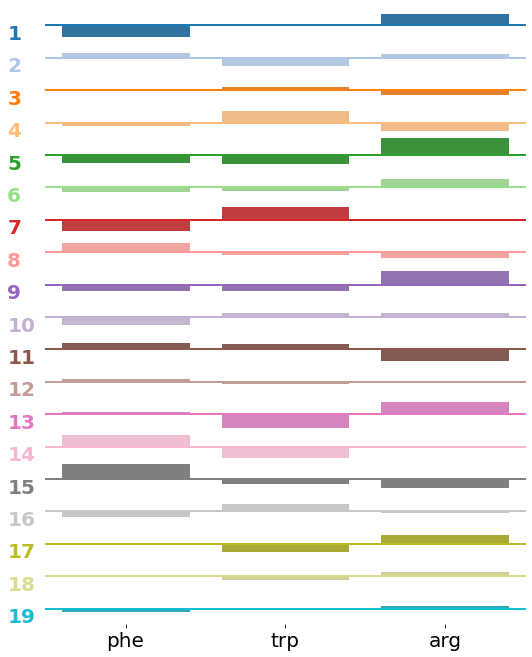

In [396]:
importlib.reload(caclust)
%matplotlib inline
cluster_cmap = 'tab20'
cluster_mean_df = caclust.get_cluster_mean_df(cluster_df)
fig = caclust.plot_cluster_tuning(cluster_mean_df, cmap=cluster_cmap)
fig_dir = dtpar.fig_dir
#fig.savefig(os.path.join(fig_dir, f"cluster_mean_{region}.svg"))

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

6.0_arg-phe vs. 6.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:7.242e-01 U_stat=1.700e+01
7.0_arg-phe vs. 7.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:4.507e-02 U_stat=3.400e+01
8.0_arg-phe vs. 8.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:1.274e-01 U_stat=9.000e+00
9.0_arg-phe vs. 9.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:5.237e-01 U_stat=1.500e+01
10.0_arg-phe vs. 10.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:4.351e-01 U_stat=1.400e+01
11.0_arg-phe vs. 11.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:5.237e-01 U_stat=2.500e+01
12.0_arg-phe vs. 12.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:1.274e-01 U_stat=9.000e+00
13.0_arg-phe vs. 13.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:2.844e-01 U_stat=2.800e+01
14.0_arg-ph

13.0_arg-phe vs. 13.0_naive: Mann-Whitney-Wilcoxon test two-sided, P_val:9.591e-01 U_stat=3.300e+01
14.0_phe-arg vs. 14.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:2.065e-01 U_stat=1.400e+01
14.0_arg-phe vs. 14.0_naive: Mann-Whitney-Wilcoxon test two-sided, P_val:3.282e-01 U_stat=2.200e+01
15.0_phe-arg vs. 15.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=2.500e+01
15.0_arg-phe vs. 15.0_naive: Mann-Whitney-Wilcoxon test two-sided, P_val:3.282e-01 U_stat=2.200e+01
16.0_phe-arg vs. 16.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:8.591e-01 U_stat=2.300e+01
16.0_arg-phe vs. 16.0_naive: Mann-Whitney-Wilcoxon test two-sided, P_val:4.418e-01 U_stat=4.000e+01
17.0_arg-phe vs. 17.0_naive: Mann-Whitney-Wilcoxon test two-sided, P_val:5.054e-01 U_stat=2.500e+01
17.0_phe-arg vs. 17.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:5.135e-01 U_stat=1.900e+01
18.0_phe-arg vs. 18.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:7.526e-02 U_stat=

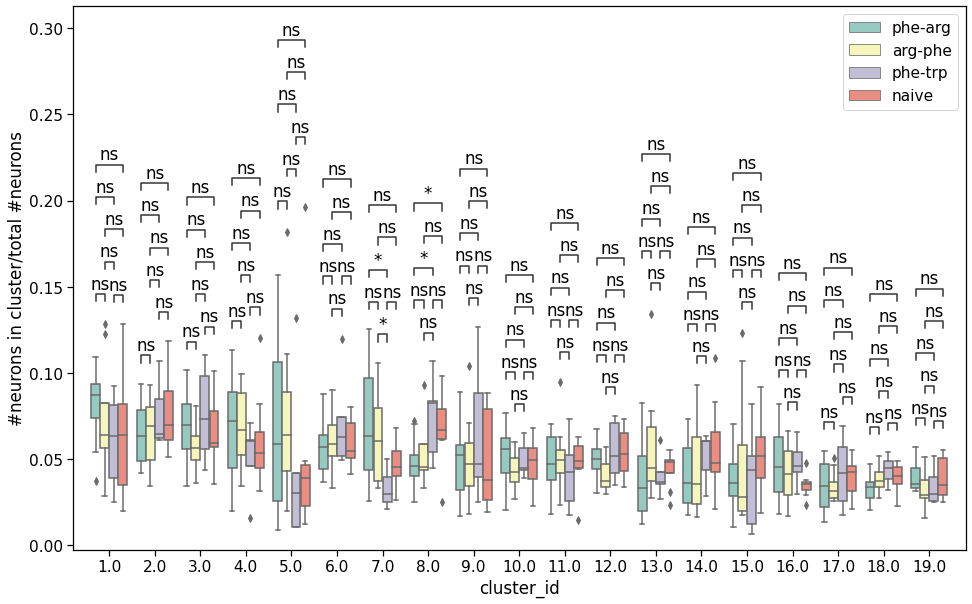

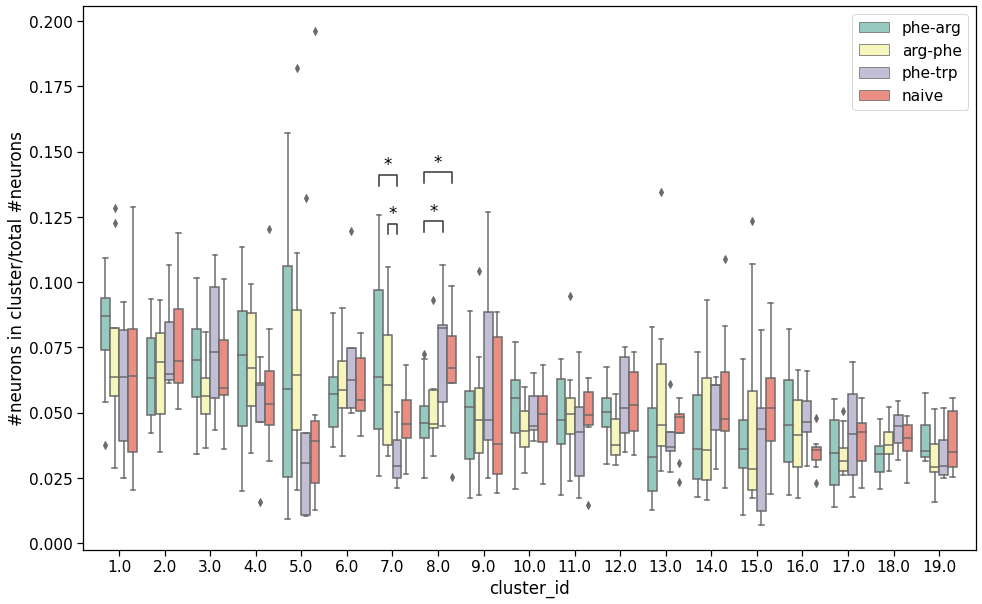

In [397]:
importlib.reload(caclust)
cluster_nrn_df = caclust.get_cluster_nrn_df(cluster_df)

selected_clusters = None
#selected_clusters = np.array([2,4,5,6,8,9,10,11])
# TODO function for select a.a. tuned neurons 
if selected_clusters is not None:
    cluster_nrn_df = cluster_nrn_df[cluster_nrn_df.cluster_id.isin(selected_clusters)]

cluster_count_df = caclust.get_cluster_count_df(cluster_nrn_df, dtpar.cond_list)

#cluster_count_df.to_csv('/media/hubo/WD_BoHu/temp_backup/cluster_count_df.csv')

importlib.reload(caclust)
cluster_ids = cluster_count_df.cluster_id.unique()
all_pairs = caclust.get_all_cond_pairs(dtpar.cond_list, cluster_ids)

importlib.reload(caclust)

#t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal
test_method = 'Mann-Whitney'
annotator, fig1 = caclust.plot_cluster_cont_with_stat(cluster_count_df, all_pairs,
                                                      dtpar.cond_list, test_method=test_method)

new_pairs = caclust.get_significant_pairs(annotator)
new_pairs

annotator2, fig2 = caclust.plot_cluster_cont_with_stat(cluster_count_df, new_pairs,
                                                       dtpar.cond_list, test_method=test_method)
#fig2.savefig(os.path.join(fig_dir, f"cluster_cont_{region}.svg"))

In [120]:
new_pairs

[]

In [23]:
cluster_df.to_pickle(os.path.join(dtpar.db_dir, 'cluster_df_{}.pkl'.format(region)))

In [24]:
cluster_df = pd.read_pickle(os.path.join(dtpar.db_dir, 'cluster_df_{}.pkl'.format(region)))